In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from IPython.display import Image, display

In [387]:
FPL_URL = "https://fantasy.premierleague.com/api/bootstrap-static/"

In [388]:
req = requests.get(FPL_URL)

In [389]:
res_json = req.json()

In [390]:
res_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [391]:
elements_df = pd.DataFrame(res_json["elements"])
elements_types_df = pd.DataFrame(res_json["element_types"])
teams_df = pd.DataFrame(res_json["teams"])

In [392]:
elements_df.head()

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,0,0,0.0,0.0,0,37605,NaN,,0,...,268,0,3441,0,53960,77,0.0,0.0,Özil,0
1,0,0,0,0.0,0.0,0,39476,NaN,,0,...,222,0,10266,0,18994,11,0.0,0.0,Sokratis,0
2,0,0,138,0.0,100.0,3,41270,NaN,,0,...,60,25,49961,168,98237,3248,0.6,4.6,David Luiz,1
3,1,6,207,100.0,75.0,7,54694,NaN,,0,...,14,72,568773,4344,3263457,3237,0.3,6.4,Aubameyang,2
4,1,3,79,100.0,100.0,2,58822,NaN,,0,...,124,21,19597,1608,38337,853,0.9,4.6,Cédric,1


In [393]:
elements_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'creativity', 'creativity_rank', 'creativity_rank_type',
       'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank',
       'ict_index_rank_type', 'id', 'in_dreamteam', 'influence',
       'influence_rank', 'influence_rank_type', 'minutes', 'news',
       'news_added', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'penalties_text', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_

In [394]:
slim_elements_df = elements_df[[
    'second_name','team','code','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points','photo'
]]

In [395]:
slim_elements_df.rename(columns={'code':'player_code'}, inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [398]:
slim_elements_df.head()

,second_name,team,player_code,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,photo,position
0,Özil,1,37605,3,0.5,67,0,3441,0.0,0,37605.jpg,Midfielder
1,Papastathopoulos,1,39476,2,0.1,48,0,10266,0.0,0,39476.jpg,Defender
2,Luiz Moreira Marinho,1,41270,2,0.8,54,886,49961,4.6,25,41270.jpg,Defender
3,Aubameyang,1,54694,3,6.5,113,1543,568773,6.4,72,54694.jpg,Midfielder
4,Soares,1,58822,2,0.3,46,365,19597,4.6,21,58822.jpg,Defender


In [399]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [400]:
slim_elements_df.head()

,second_name,team,player_code,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,photo,position
0,Özil,1,37605,3,0.5,67,0,3441,0.0,0,37605.jpg,Midfielder
1,Papastathopoulos,1,39476,2,0.1,48,0,10266,0.0,0,39476.jpg,Defender
2,Luiz Moreira Marinho,1,41270,2,0.8,54,886,49961,4.6,25,41270.jpg,Defender
3,Aubameyang,1,54694,3,6.5,113,1543,568773,6.4,72,54694.jpg,Midfielder
4,Soares,1,58822,2,0.3,46,365,19597,4.6,21,58822.jpg,Defender


In [401]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [402]:
slim_elements_df.head()

,second_name,team,player_code,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,photo,position
0,Özil,Arsenal,37605,3,0.5,67,0,3441,0.0,0,37605.jpg,Midfielder
1,Papastathopoulos,Arsenal,39476,2,0.1,48,0,10266,0.0,0,39476.jpg,Defender
2,Luiz Moreira Marinho,Arsenal,41270,2,0.8,54,886,49961,4.6,25,41270.jpg,Defender
3,Aubameyang,Arsenal,54694,3,6.5,113,1543,568773,6.4,72,54694.jpg,Midfielder
4,Soares,Arsenal,58822,2,0.3,46,365,19597,4.6,21,58822.jpg,Defender


In [403]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [404]:
slim_elements_df.now_cost = slim_elements_df.now_cost / 10

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [405]:
slim_elements_df = slim_elements_df.drop(columns=['value_season', 'minutes', 'transfers_in', 'element_type', 'selected_by_percent'])

In [406]:
slim_elements_df.head()

,second_name,team,player_code,now_cost,total_points,photo,position,value
0,Özil,Arsenal,37605,6.7,0,37605.jpg,Midfielder,0.0
1,Papastathopoulos,Arsenal,39476,4.8,0,39476.jpg,Defender,0.0
2,Luiz Moreira Marinho,Arsenal,41270,5.4,25,41270.jpg,Defender,4.6
3,Aubameyang,Arsenal,54694,11.3,72,54694.jpg,Midfielder,6.4
4,Soares,Arsenal,58822,4.6,21,58822.jpg,Defender,4.6


In [407]:
slim_elements_df.sort_values('value', ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
33,Martínez,Aston Villa,98980,5.2,107,98980.jpg,Goalkeeper,20.6
614,Soucek,West Ham,215439,5.3,106,215439.jpg,Midfielder,20.0
300,Bamford,Leeds,106617,6.6,124,106617.jpg,Forward,18.8
120,Pope,Burnley,98747,5.4,100,98747.jpg,Goalkeeper,18.5
282,Justin,Leicester,220627,5.1,92,220627.jpg,Defender,18.0
48,Targett,Aston Villa,169359,4.8,85,169359.jpg,Defender,17.7
7,Leno,Arsenal,80201,5.0,88,80201.jpg,Goalkeeper,17.6
601,Cresswell,West Ham,55459,5.6,97,55459.jpg,Defender,17.3
298,Dallas,Leeds,87873,4.8,83,87873.jpg,Defender,17.3
454,Wilson,Newcastle,75115,6.8,115,75115.jpg,Forward,16.9


In [408]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,5.084615
3,Midfielder,4.848134
1,Forward,4.488372
2,Goalkeeper,4.221333


In [409]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [410]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,9.311765
0,Defender,6.963743
3,Midfielder,6.465174
1,Forward,5.761194


In [411]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,9.295000
8,Leeds,8.452381
18,West Ham,8.213043
11,Man City,7.791304
5,Crystal Palace,7.576190
4,Chelsea,7.179167
15,Southampton,7.145833
12,Man Utd,7.073913
2,Brighton,7.062500
9,Leicester,6.844000


In [412]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

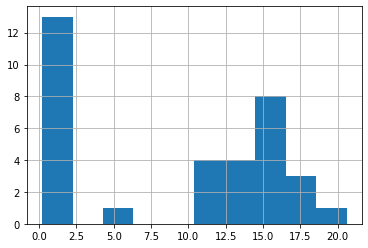

In [413]:
goal_df.value.hist()
plt.show()

In [414]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
33,Martínez,Aston Villa,98980,5.2,107,98980.jpg,Goalkeeper,20.6
120,Pope,Burnley,98747,5.4,100,98747.jpg,Goalkeeper,18.5
7,Leno,Arsenal,80201,5.0,88,80201.jpg,Goalkeeper,17.6
311,Meslier,Leeds,437495,4.7,79,437495.jpg,Goalkeeper,16.8
494,McCarthy,Southampton,58376,4.6,76,58376.jpg,Goalkeeper,16.5
261,Schmeichel,Leicester,17745,5.5,90,17745.jpg,Goalkeeper,16.4
597,Fabianski,West Ham,37096,5.1,83,37096.jpg,Goalkeeper,16.3
252,Areola,Fulham,84182,4.5,71,84182.jpg,Goalkeeper,15.8
167,Guaita,Crystal Palace,40836,4.8,75,40836.jpg,Goalkeeper,15.6
367,Santana de Moraes,Man City,121160,6.1,93,121160.jpg,Goalkeeper,15.2


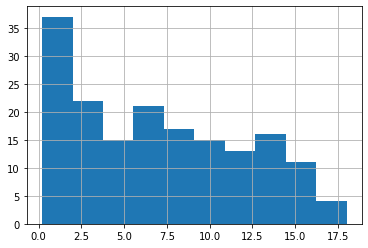

In [415]:
def_df.value.hist()
plt.show()

In [416]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
282,Justin,Leicester,220627,5.1,92,220627.jpg,Defender,18.0
48,Targett,Aston Villa,169359,4.8,85,169359.jpg,Defender,17.7
601,Cresswell,West Ham,55459,5.6,97,55459.jpg,Defender,17.3
298,Dallas,Leeds,87873,4.8,83,87873.jpg,Defender,17.3
412,Wan-Bissaka,Man Utd,214590,5.5,89,214590.jpg,Defender,16.2
362,Stones,Man City,97299,5.2,83,97299.jpg,Defender,16.0
382,Gato Alves Dias,Man City,171314,6.1,97,171314.jpg,Defender,15.9
506,Bednarek,Southampton,171771,4.9,76,171771.jpg,Defender,15.5
598,Ogbonna,West Ham,40669,5.0,77,40669.jpg,Defender,15.4
366,Cancelo,Man City,121145,6.0,92,121145.jpg,Defender,15.3


In [417]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
614,Soucek,West Ham,215439,5.3,106,215439.jpg,Midfielder,20.0
642,Lomba Neto,Wolves,247632,5.7,96,247632.jpg,Midfielder,16.8
43,Grealish,Aston Villa,114283,7.8,125,114283.jpg,Midfielder,16.0
301,Harrison,Leeds,221399,5.4,86,221399.jpg,Midfielder,15.9
20,Saka,Arsenal,223340,5.4,83,223340.jpg,Midfielder,15.4
360,Gündogan,Man City,59859,5.9,91,59859.jpg,Midfielder,15.4
533,Son,Spurs,85971,9.7,144,85971.jpg,Midfielder,14.8
501,Ward-Prowse,Southampton,101178,6.0,89,101178.jpg,Midfielder,14.8
401,Borges Fernandes,Man Utd,141746,11.4,162,141746.jpg,Midfielder,14.2
180,Zaha,Crystal Palace,82403,7.2,102,82403.jpg,Midfielder,14.2


In [418]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,player_code,now_cost,total_points,photo,position,value
300,Bamford,Leeds,106617,6.6,124,106617.jpg,Forward,18.8
454,Wilson,Newcastle,75115,6.8,115,75115.jpg,Forward,16.9
61,Watkins,Aston Villa,178301,6.3,91,178301.jpg,Forward,14.4
210,Calvert-Lewin,Everton,177815,7.6,108,177815.jpg,Forward,14.2
507,Adams,Southampton,200439,5.9,77,200439.jpg,Forward,13.1
531,Kane,Spurs,78830,11.0,143,78830.jpg,Forward,13.0
78,Maupay,Brighton,115382,6.1,74,115382.jpg,Forward,12.1
268,Vardy,Leicester,101668,10.0,116,101668.jpg,Forward,11.6
461,McGoldrick,Sheffield Utd,27436,5.2,60,27436.jpg,Forward,11.5
237,Decordova-Reid,Fulham,96994,5.3,57,96994.jpg,Forward,10.8


In [419]:
liverpool_df = slim_elements_df.loc[slim_elements_df.team == 'Liverpool']

In [420]:
liverpool_df.sort_values('value',ascending=False).head(20)

,second_name,team,player_code,now_cost,total_points,photo,position,value
337,Robertson,Liverpool,122798,7.4,94,122798.jpg,Defender,12.7
334,Ramses Becker,Liverpool,116535,5.9,71,116535.jpg,Goalkeeper,12.0
336,Salah,Liverpool,118748,12.7,148,118748.jpg,Midfielder,11.7
325,Wijnaldum,Liverpool,41733,5.3,62,41733.jpg,Midfielder,11.7
340,Alexander-Arnold,Liverpool,169187,7.4,71,169187.jpg,Defender,9.6
326,Henderson,Liverpool,56979,5.4,51,56979.jpg,Midfielder,9.4
331,Firmino,Liverpool,92217,9.5,86,92217.jpg,Forward,9.1
333,Mané,Liverpool,110979,11.9,103,110979.jpg,Midfielder,8.7
328,Matip,Liverpool,60914,5.4,42,60914.jpg,Defender,7.8
335,Tavares,Liverpool,116643,5.4,40,116643.jpg,Midfielder,7.4


In [421]:
def get_players_from_team(team_name):
    return slim_elements_df.loc[slim_elements_df.team == team_name]

In [422]:
def get_player(player_code):
    return slim_elements_df.loc[slim_elements_df.player_code == player_code]

In [434]:
def get_player_picture(player_code, display_picture=False):
    player = get_player(player_code)
    photo_id = player.photo.item().replace('.jpg', '') # Move to top
    res = requests.get(f'https://resources.premierleague.com/premierleague/photos/players/110x140/p{photo_id}.png')
    content = res.content
    if display_picture:
        display(Image(content))
    return content

In [435]:
liverpool_df = get_players_from_team('Liverpool')

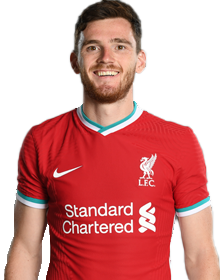

In [436]:
player_code = 122798
player_pic = get_player_picture(player_code=player_code, display_picture=True)

In [437]:
slim_elements_df.to_csv('./fpl_data.csv')